In [121]:
# Importing required libraries
import numpy as np
import pandas as pd

import datetime as dt
import yfinance as yf
import pandas_datareader.data as web
import cpi
import wbdata
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, LeakyReLU
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt



In [ ]:
start = dt.datetime(2005, 1, 1)
end = dt.datetime(2025, 5, 31)

In [174]:
r = pd.read_csv('sp500_stocks.csv')
stock_list = r['Ticker'].values.tolist() + ['^GSPC']
r.set_index('Ticker', inplace=True)
# stock_list 

In [158]:
adj_close_data = {}

for stock in stock_list:
    data = yf.download(stock, start-pd.offsets.BDay(1), end+pd.offsets.BDay(1), auto_adjust=False)['Adj Close']
    first_date = data.index.min()
    if first_date.year <= 2005:
        adj_close_data[stock] = data[stock]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
returns = pd.DataFrame(adj_close_data).pct_change().dropna()
returns


,AAPL,MSFT,NVDA,AMZN,GOOGL,GOOG,BRK-B,WMT,LLY,JPM,...,HAS,MKTX,PARA,MTCH,ALB,CRL,MHK,IVZ,APA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-22,0.007075,-0.005238,0.030430,0.005105,0.013393,0.013393,-0.003048,-0.001028,0.002105,0.005523,...,0.012827,0.042294,-0.005545,0.009025,0.021984,0.003969,-0.000795,0.001920,0.002678,0.004221
2005-12-23,-0.009051,0.001881,0.007784,0.000000,-0.002569,-0.002569,0.003057,-0.005350,0.010154,0.003746,...,-0.008281,-0.009919,0.015532,0.013238,0.019413,-0.006744,-0.000341,-0.001278,-0.011806,0.000426
2005-12-27,0.011997,-0.006757,0.006127,-0.013409,-0.014596,-0.014596,-0.003048,-0.012619,0.001906,-0.002488,...,-0.000491,-0.025501,0.005882,-0.006003,-0.006691,-0.016624,-0.009552,-0.007038,-0.039397,-0.009553
2005-12-28,-0.008891,-0.002646,0.009268,-0.010296,0.004827,0.004827,-0.002887,0.002305,-0.001038,-0.004738,...,-0.007863,0.019626,-0.023392,0.004618,0.008032,0.022619,0.007807,0.002578,0.013030,0.001297
2005-12-29,-0.028816,-0.004547,-0.022300,-0.001457,-0.015327,-0.015327,0.004599,-0.007525,-0.005021,-0.001253,...,0.001981,-0.003667,-0.001996,-0.001415,-0.000772,-0.003958,-0.002051,-0.007712,-0.005262,-0.002981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-03,-0.092456,-0.023630,-0.078066,-0.089791,-0.040244,-0.039217,-0.014059,-0.027852,-0.035602,-0.069685,...,-0.122827,0.025234,-0.035294,-0.035166,-0.079585,-0.055600,-0.079471,-0.118547,-0.164783,-0.048396
2025-04-04,-0.072887,-0.035566,-0.073576,-0.041534,-0.033970,-0.032038,-0.069073,-0.046642,-0.064479,-0.074838,...,-0.018731,-0.014851,-0.035714,-0.047714,-0.120150,-0.028940,-0.020308,-0.073753,-0.144307,-0.059750
2025-04-07,-0.036734,-0.005502,0.035309,0.024912,0.007898,0.010153,-0.006403,0.007693,-0.019615,0.019783,...,-0.014640,-0.023575,-0.018970,-0.030967,-0.007007,-0.020672,-0.033034,-0.007806,-0.014493,-0.002331


In [ ]:
last_price = pd.DataFrame(adj_close_data).iloc[-1].to_frame(name='Last_Price')

merged = last_price.merge(r, how='left', left_index=True, right_index=True)
# merged.to_csv('filtered_sp500_stocks.csv')

In [138]:
tickers = returns.columns.to_list() 
returns

,AAPL,MSFT,NVDA,AMZN,GOOGL,GOOG,BRK-B,WMT,LLY,JPM,...,HAS,MKTX,PARA,MTCH,ALB,CRL,MHK,IVZ,APA,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,-0.017235,0.000749,0.000851,0.005193,0.051455,0.051455,-0.012602,0.010034,-0.008811,0.003589,...,-0.014448,-0.062317,NaN,-0.053584,-0.017050,-0.014345,-0.015890,-0.008758,-0.045283,-0.008119
2005-01-04,0.010270,0.003740,-0.047074,-0.053459,-0.040501,-0.040501,-0.015178,-0.002436,-0.013334,-0.010306,...,-0.002617,-0.024451,NaN,-0.019510,-0.040736,-0.021830,-0.011693,-0.024097,-0.008078,-0.011671
2005-01-05,0.008758,-0.002236,0.009346,-0.008780,-0.005090,-0.005090,0.001751,0.001315,0.010450,0.002083,...,-0.007874,0.002571,NaN,-0.007803,-0.024110,-0.006763,-0.010704,0.008231,-0.003340,-0.003628
2005-01-06,0.000775,-0.001120,-0.009698,-0.017237,-0.025632,-0.025632,0.004895,0.014262,0.008024,0.005716,...,0.001058,-0.020513,NaN,-0.002753,0.019371,0.018157,0.005695,0.006530,0.016133,0.003506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-03,-0.092456,-0.023630,-0.078066,-0.089791,-0.040244,-0.039217,-0.014059,-0.027852,-0.035602,-0.069685,...,-0.122827,0.025234,-0.035294,-0.035166,-0.079585,-0.055600,-0.079471,-0.118547,-0.164783,-0.048396
2025-04-04,-0.072887,-0.035566,-0.073576,-0.041534,-0.033970,-0.032038,-0.069073,-0.046642,-0.064479,-0.074838,...,-0.018731,-0.014851,-0.035714,-0.047714,-0.120150,-0.028940,-0.020308,-0.073753,-0.144307,-0.059750
2025-04-07,-0.036734,-0.005502,0.035309,0.024912,0.007898,0.010153,-0.006403,0.007693,-0.019615,0.019783,...,-0.014640,-0.023575,-0.018970,-0.030967,-0.007007,-0.020672,-0.033034,-0.007806,-0.014493,-0.002331


In [ ]:
r = pd.read_csv('filtered_sp500_stocks.csv')

In [185]:

r[r['Ticker'].isin(tickers)]['Sector'].value_counts(normalize=True)

KeyError: 'Ticker'

In [140]:
# # customize seed for different stocks
# np.random.seed(42)

# # list of all potential stocks 
# ticker_list = ['AAPL','AXP', 'BAC', 'C', 'CSCO', 'GS', 'IBM', 'INTC', 'JPM', 'MSFT', 'NVDA', 'CRM', 'QCOM', 'NOW', 'ORCL', 'AVGO', 'GDDY',
#                'WIX', 'TSM', 'TSLA', 'SNOW', 'HUBS', 'DOCU', 'MS']

# # selecting 15 random stocks
# stock_list = np.random.choice(ticker_list,15,replace=False)
# stock_list = list(np.sort(stock_list))
# print(f'These are the fifteen stocks assigned to you: {" ".join(stock_list)}')

In [141]:
# defining start and end date
# start = dt.datetime(2005, 1, 1)
# end = dt.datetime(2025, 5, 31)

# getting returns of the stocks
# calculates returns using adjusted close price
# ensures that we have returns of only those dates where all companies have available information
# returns = yf.download(stock_list, start-pd.offsets.BDay(1), end+pd.offsets.BDay(1), auto_adjust=False)['Adj Close'].pct_change().dropna()


# S&P 500
# sp500 = yf.Ticker("^GSPC")
# sp500_data = sp500.history(period="25y")
# sp500_data['SP500'] = sp500_data['Close'].pct_change()
# sp500_data = sp500_data.drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

# sp500_data.index = sp500_data.index.strftime('%m-%d-%Y')
# sp500_data.index = pd.to_datetime(sp500_data.index)
# sp500_mon = sp500_data.resample(rule = 'ME').apply(lambda x: x.add(1).prod().sub(1))



In [145]:
# Find finding monthly returns
# returns = pd.merge(returns, sp500_data, left_index = True, right_index = True )
returns.rename(columns ={'^GSPC':'SP500'}, inplace=True)
returns_mon = returns.resample(rule = 'ME').apply(lambda x: x.add(1).prod().sub(1))

In [149]:
# Standard deviation for 2018, May SP500 
sp500_stdev = returns.loc[(returns.index.year == 2005) & (returns.index.month == 1)]['SP500'].std()
print(f"The standard deviation for SP500 in May of 2018 is {sp500_stdev}")

# Calculating STDEV for each month
monthly_std = returns.groupby(by=[returns.index.month, returns.index.year]).std()
monthly_std.index = pd.to_datetime(monthly_std.index.map(lambda x: f"{x[1]}-{x[0]}"), format="%Y-%m")
monthly_std.sort_index(inplace=True)
monthly_std.index = returns_mon.index

# Double check 
monthly_std

The standard deviation for SP500 in May of 2018 is 0.006446716061486798


,AAPL,MSFT,NVDA,AMZN,GOOGL,GOOG,BRK-B,WMT,LLY,JPM,...,HAS,MKTX,PARA,MTCH,ALB,CRL,MHK,IVZ,APA,SP500
Date,,,,,,,,,,,,,,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,0.028358,0.007190,0.026336,0.023875,0.029652,0.029652,0.011541,0.007518,0.013959,0.008118,...,0.017163,0.021753,NaN,0.019488,0.016278,0.013870,0.011310,0.022759,0.015977,0.006447
2005-02-28,0.022854,0.005075,0.034145,0.034690,0.028190,0.028190,0.005145,0.006387,0.008542,0.008255,...,0.018253,0.045178,NaN,0.017951,0.020351,0.025997,0.011810,0.016842,0.017468,0.006730
2005-03-31,0.022648,0.007041,0.019879,0.011008,0.012576,0.012576,0.011294,0.009128,0.012007,0.008502,...,0.010823,0.040210,NaN,0.018942,0.015017,0.013119,0.012615,0.018272,0.020215,0.006339
2005-04-30,0.035998,0.015504,0.024168,0.016300,0.021197,0.021197,0.011984,0.008622,0.022431,0.011104,...,0.014712,0.045214,NaN,0.012603,0.024804,0.013446,0.015610,0.017337,0.022278,0.009503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,0.010245,0.012478,0.020958,0.017436,0.022711,0.022279,0.007855,0.011895,0.014824,0.011732,...,0.016162,0.015194,0.017057,0.024710,0.029382,0.019043,0.014850,0.017700,0.021904,0.008986
2025-01-31,0.019239,0.021088,0.053703,0.013866,0.017176,0.016701,0.011206,0.009650,0.023773,0.009224,...,0.013012,0.011235,0.017161,0.017276,0.025680,0.023581,0.021596,0.025666,0.018131,0.008847
2025-02-28,0.016351,0.009875,0.034132,0.017118,0.021390,0.020752,0.013153,0.022547,0.014586,0.015448,...,0.033502,0.023505,0.015896,0.025014,0.023612,0.024465,0.016536,0.017426,0.030708,0.008336


In [ ]:
# monthly_std.to_csv('monthly_stdev.csv')

In [151]:
# Finding other features we care about 
# Finding risk free-rate
rf = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0][['RF']].div(100)
rf.index = rf.index.to_timestamp(how='end').normalize()
# rf_monthly = rf.resample('M').mean()

# CPI data from FRED
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)

# Calculate monthly inflation rates as percentage change
inflation_rate = cpi.pct_change().dropna()
inflation_rate.index = inflation_rate.index.to_period('M').to_timestamp(how='end').normalize()
inflation_rate.columns = ['Inflation Rate']

# Rolling Average
rolling_avg = returns.rolling(window=30).mean()
rolling_avg.columns = [name+"_ROLL_AVG" for name in rolling_avg.columns]
rolling_monthly = rolling_avg.resample('M').last()

/var/folders/hn/ds6pkb3n5j16s47f26mbf8x40000gn/T/ipykernel_50132/2324385532.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  rf = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0][['RF']].div(100)
/var/folders/hn/ds6pkb3n5j16s47f26mbf8x40000gn/T/ipykernel_50132/2324385532.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  rf = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0][['RF']].div(100)
/var/folders/hn/ds6pkb3n5j16s47f26mbf8x40000gn/T/ipykernel_50132/2324385532.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rolling_monthly = rolling_avg.resample('M').last()


In [152]:
# Creating the final df 
result = pd.concat([returns_mon, monthly_std], axis=1, keys=['RETURN', 'STDEV'])
result.columns = result.columns.get_level_values(1) + '_' + result.columns.get_level_values(0).astype(str)

result = pd.merge(result, rf, how='left', left_index=True, right_index=True)
result = pd.merge(result, inflation_rate, how = 'left', left_index=True, right_index=True) 
result = pd.merge(result, rolling_monthly, how = 'left', left_index=True, right_index=True)

# Removing first two rows because rolling average has errors
result = result.iloc[2:]


In [153]:
result

,AAPL_RETURN,MSFT_RETURN,NVDA_RETURN,AMZN_RETURN,GOOGL_RETURN,GOOG_RETURN,BRK-B_RETURN,WMT_RETURN,LLY_RETURN,JPM_RETURN,...,HAS_ROLL_AVG,MKTX_ROLL_AVG,PARA_ROLL_AVG,MTCH_ROLL_AVG,ALB_ROLL_AVG,CRL_ROLL_AVG,MHK_ROLL_AVG,IVZ_ROLL_AVG,APA_ROLL_AVG,SP500_ROLL_AVG
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-28,0.166711,-0.039664,0.264833,-0.186025,-0.039004,-0.039004,0.007014,-0.015076,0.039658,-0.020895,...,0.004581,-0.007425,NaN,-0.003401,0.002621,0.001470,0.000778,0.002359,0.007074,0.000754
2005-03-31,-0.071111,-0.039348,-0.180406,-0.025867,-0.039789,-0.039789,-0.052736,-0.026201,-0.069643,-0.053352,...,0.000418,-0.004497,NaN,-0.002285,0.001000,-0.002574,-0.002963,-0.002585,0.002267,-0.000801
2005-04-30,-0.134629,0.046752,-0.077020,-0.055734,0.218769,0.218769,-0.020308,-0.059270,0.122265,0.036007,...,-0.002578,0.004882,NaN,-0.000845,-0.000577,0.000010,-0.004464,-0.004526,-0.003266,-0.000911
2005-05-31,0.102607,0.022998,0.235748,0.097342,0.260318,0.260318,0.004289,0.005117,0.003541,0.007326,...,0.001726,-0.010287,NaN,0.003825,0.005137,0.001588,0.001740,-0.000124,0.001038,0.001331
2005-06-30,-0.074195,-0.037209,-0.014019,-0.068150,0.060879,0.060879,-0.009431,0.020538,-0.044425,-0.012028,...,0.000446,0.003795,NaN,0.000117,-0.001758,0.000019,-0.000508,0.001342,0.006087,0.000173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,0.055155,-0.004629,-0.028577,0.055318,0.121734,0.118283,-0.061571,-0.021079,-0.029358,-0.040085,...,-0.003047,-0.004669,-0.000827,0.002347,-0.005648,-0.000396,-0.005297,-0.000235,0.001222,0.000093
2025-01-31,-0.057583,-0.015279,-0.105890,0.083367,0.077760,0.079605,0.033953,0.086442,0.050622,0.120856,...,-0.001570,-0.001752,-0.000184,0.003680,-0.005257,-0.004544,-0.000978,0.002328,0.000527,-0.000135
2025-02-28,0.025872,-0.041618,0.040393,-0.106866,-0.165376,-0.162354,0.096358,0.004584,0.137023,-0.009914,...,0.005305,-0.003726,0.002943,-0.000129,-0.006772,-0.001429,-0.003199,0.001280,-0.006173,0.000057


In [155]:
result.columns.to_list()

['AAPL_RETURN',
 'MSFT_RETURN',
 'NVDA_RETURN',
 'AMZN_RETURN',
 'GOOGL_RETURN',
 'GOOG_RETURN',
 'BRK-B_RETURN',
 'WMT_RETURN',
 'LLY_RETURN',
 'JPM_RETURN',
 'UNH_RETURN',
 'XOM_RETURN',
 'COST_RETURN',
 'NFLX_RETURN',
 'ORCL_RETURN',
 'PG_RETURN',
 'JNJ_RETURN',
 'HD_RETURN',
 'KO_RETURN',
 'BAC_RETURN',
 'CVX_RETURN',
 'CRM_RETURN',
 'CSCO_RETURN',
 'ABT_RETURN',
 'IBM_RETURN',
 'MCD_RETURN',
 'WFC_RETURN',
 'LIN_RETURN',
 'MRK_RETURN',
 'GE_RETURN',
 'PEP_RETURN',
 'T_RETURN',
 'ACN_RETURN',
 'ISRG_RETURN',
 'VZ_RETURN',
 'AXP_RETURN',
 'MS_RETURN',
 'RTX_RETURN',
 'TMO_RETURN',
 'GS_RETURN',
 'INTU_RETURN',
 'DIS_RETURN',
 'PGR_RETURN',
 'QCOM_RETURN',
 'AMD_RETURN',
 'AMGN_RETURN',
 'ADBE_RETURN',
 'TXN_RETURN',
 'BKNG_RETURN',
 'SPGI_RETURN',
 'CAT_RETURN',
 'BSX_RETURN',
 'TJX_RETURN',
 'BLK_RETURN',
 'NEE_RETURN',
 'SYK_RETURN',
 'DHR_RETURN',
 'SCHW_RETURN',
 'UNP_RETURN',
 'CMCSA_RETURN',
 'GILD_RETURN',
 'HON_RETURN',
 'PFE_RETURN',
 'LOW_RETURN',
 'VRTX_RETURN',
 'DE_RETU

# MLP 
LSTM 

In [56]:
def test_train_split(stock): 
    df = pd.concat([result.filter(like = stock),result[['SP500_RETURN','SP500_STDEV', 'RF', 'Inflation Rate']]], axis=1)
    df.sort_index(inplace=True)

    # # Including past historical distorts the result 
    # aapl = aapl.loc[(aapl.index.year >= 2022)]

    # shift target variable 
    df[f"Next_{stock}_RETURN"] = df[f"{stock}_RETURN"].shift(-1)


    # NaN in last row because of the shift 
    df.dropna(inplace=True)


    # Defining target and features 
    features = [col for col in df.columns if col not in [f"Next_{stock}_RETURN"]]
    target = f"Next_{stock}_RETURN"

    X = df[features]
    y = df[target]

    # Normalize and split the data 
    # scaler = StandardScaler()
    scaler = MinMaxScaler() 

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # reshaping because lstm needs 3d input 
    X_train = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    return df, X_train, X_test, y_train, y_test






def lstm(X_train, X_test, y_train, y_test): 
    # In this case dr
    model = Sequential([
    LSTM(100, return_sequences=True), # , input_shape=(X_train.shape[1], X_train.shape[2])), 
    LSTM(100),
    # LeakyReLU(alpha=0.01), 
    Dense(50, activation = 'tanh') , #activation='relu'), 
    # LeakyReLU(alpha=0.01), 
    # Dense(25) , ##activation='relu'), 
    # LeakyReLU(alpha=0.01),    
    # Dense(50, activation = 'tanh') ,
    Dense(1)
])

    model.compile(optimizer="adam", loss="mse")

    model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))
    
    next_month_pred = model.predict(X_test[-1].reshape(1, 1, X_test.shape[2]))[0][0]
    print("Predicted Return for Next Month:", next_month_pred)


    y_pred = model.predict(X_test)
    y_test_copy = y_test.values.reshape(-1,1)

    Y = np.hstack((y_pred, y_test_copy))
    print('Side by side comparison y_pred vs y') 
    print(Y)

    print('The Mean Squared Error is:', mean_squared_error(y_pred,y_test_copy))
    
    plt.plot(y_test, label = "actual return")
    plt.plot(pd.Series(y_pred.flatten(), index=y_test.index), label = "predictions")
    plt.legend() 
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.xticks(rotation=45)
    plt.show()

    return next_month_pred




Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0061 - val_loss: 0.0042
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - val_loss: 0.0044
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - val_lo

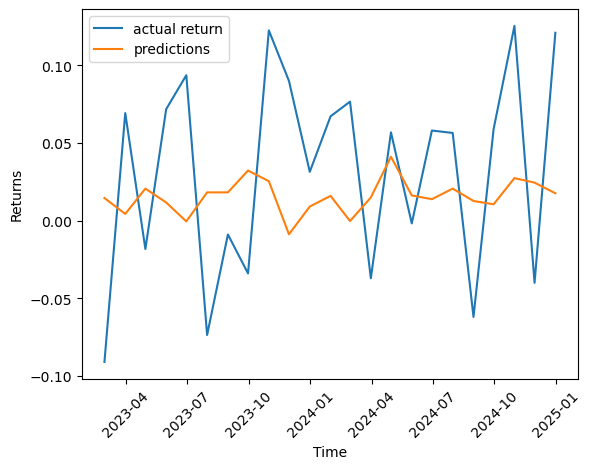

0.017570848

In [57]:
df, X_train, X_test, y_train, y_test = test_train_split('JPM')

pred = lstm(X_train, X_test, y_train, y_test)
pred

In [58]:


# monthly_std.to_csv('monthly_stdev.csv')

In [59]:


df

,JPM_RETURN,JPM_STDEV,JPM_ROLL_AVG,SP500_RETURN,SP500_STDEV,RF,Inflation Rate,Next_JPM_RETURN
Date,,,,,,,,
2015-06-30,0.030100,0.010172,0.000710,-0.021012,0.007012,0.0000,0.002768,0.017974
2015-07-31,0.017974,0.010288,0.000154,0.019742,0.007372,0.0000,0.001586,-0.064643
2015-08-31,-0.064643,0.020382,-0.002426,-0.062581,0.016831,0.0000,-0.000004,-0.048830
2015-09-30,-0.048830,0.018252,-0.003494,-0.026443,0.014185,0.0000,-0.002248,0.061400
2015-10-31,0.061400,0.013242,0.002093,0.082983,0.007941,0.0000,0.000989,0.037821
...,...,...,...,...,...,...,...,...
2024-08-31,0.056391,0.014808,0.002401,0.022835,0.012262,0.0048,0.001802,-0.062011
2024-09-30,-0.062011,0.015982,-0.000395,0.020197,0.008719,0.0040,0.002292,0.058901
2024-10-31,0.058901,0.014478,0.002047,-0.009897,0.006936,0.0039,0.002265,0.125270


AAPL
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0079 - val_loss: 0.0036
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0084 - val_loss: 0.0041
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0075 - val_loss: 0.0036
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - val_loss: 0.0038
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - val_loss: 0.0037
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0077 - val_loss: 0.0036
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0066 - val_loss: 0.0037
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071 - val_loss: 0.0036
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - v

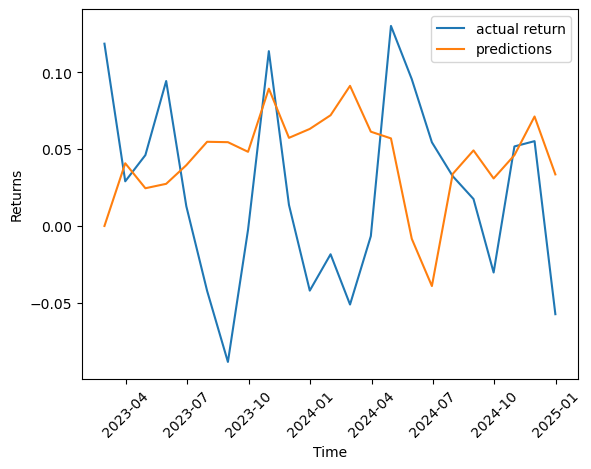

AVGO
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0064 - val_loss: 0.0157
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - val_loss: 0.0141
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 0.0144
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0063 - val_loss: 0.0159
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0061 - val_loss: 0.0169
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0166
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0049 - val_loss: 0.0157
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0151
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0152
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - val_loss: 0.0156
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - val_loss: 0.0159
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - v

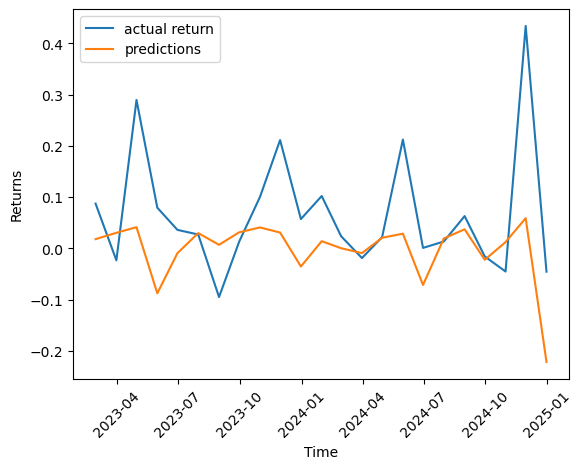

AXP
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - val_loss: 0.0041
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - val_loss: 0.0041
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - val_loss: 0.0042
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - va

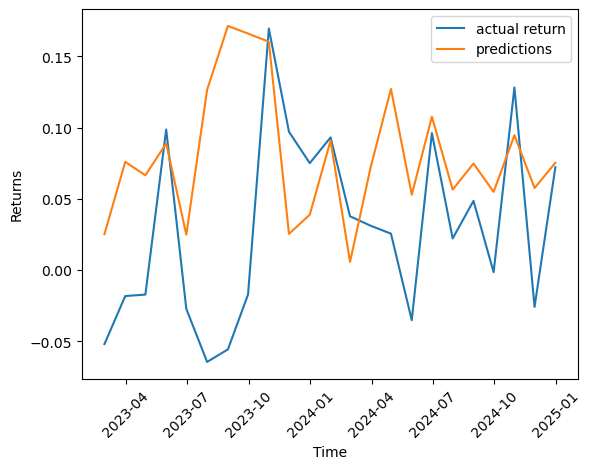

BAC
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0083 - val_loss: 0.0059
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083 - val_loss: 0.0060
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0087 - val_loss: 0.0062
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - val_loss: 0.0061
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0084 - val_loss: 0.0060
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0090 - val_loss: 0.0059
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0060
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083 - val_loss: 0.0063
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0087 - val_loss: 0.0065
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0067 - va

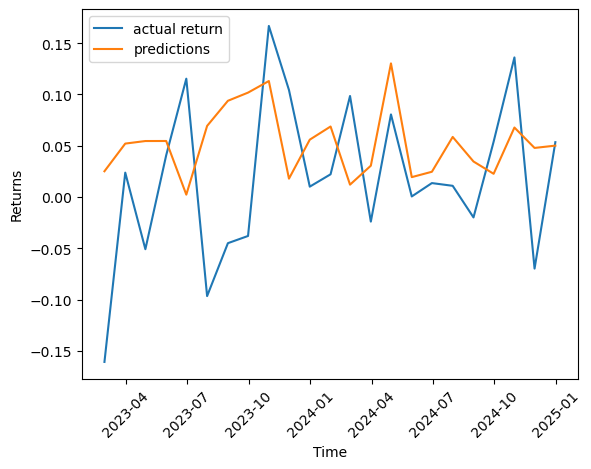

C
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0091 - val_loss: 0.0060
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0106 - val_loss: 0.0056
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - val_loss: 0.0061
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - val_loss: 0.0068
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - val_loss: 0.0060
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0096 - val_loss: 0.0056
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - val_loss: 0.0057
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083 - val_loss: 0.0059
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0078 - val_loss: 0.0061
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - val_loss: 0.0060
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0079 - val_loss: 0.0057
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - val_

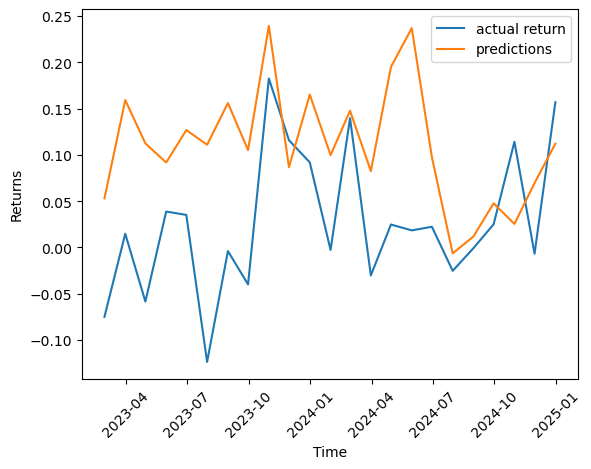

CRM
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - val_loss: 0.0087
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083 - val_loss: 0.0092
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078 - val_loss: 0.0095
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - val_loss: 0.0088
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0088
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086 - va

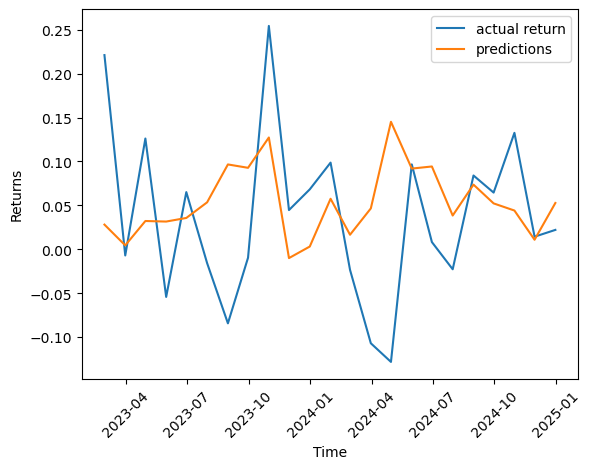

CSCO
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049 - val_loss: 0.0024
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - v

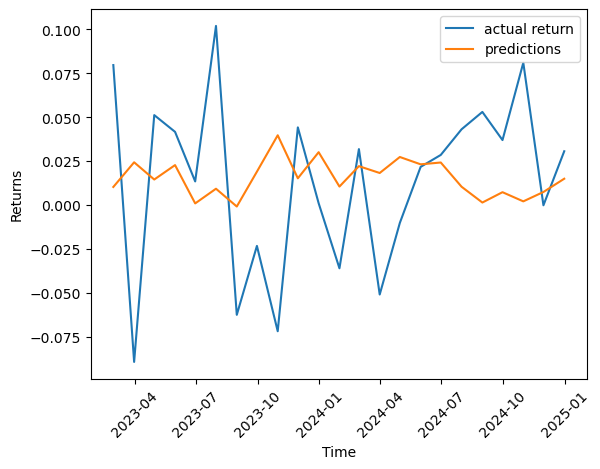

GDDY
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0065 - val_loss: 0.0086
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - val_loss: 0.0099
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0059 - val_loss: 0.0119
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - val_loss: 0.0099
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - val_loss: 0.0095
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - val_loss: 0.0098
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - val_loss: 0.0110
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - val_loss: 0.0121
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - val_loss: 0.0115
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0108
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - v

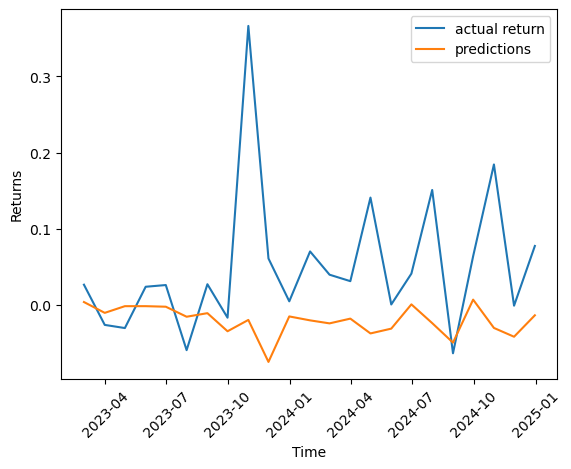

GS
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0072 - val_loss: 0.0054
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0077 - val_loss: 0.0062
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - val_loss: 0.0059
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - val_loss: 0.0061
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - val_loss: 0.0064
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - val_loss: 0.0060
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - val_loss: 0.0059
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0070 - val

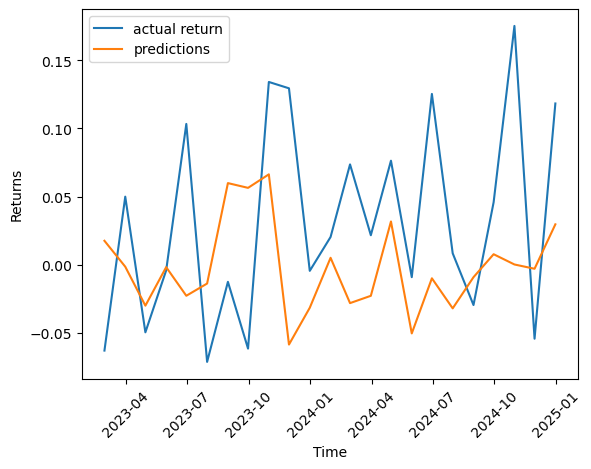

HUBS
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0175 - val_loss: 0.0123
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0177 - val_loss: 0.0124
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0179 - val_loss: 0.0121
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - val_loss: 0.0123
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0153 - val_loss: 0.0121
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0168 - val_loss: 0.0121
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - val_loss: 0.0122
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0171 - val_loss: 0.0121
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0150 - val_loss: 0.0121
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0153 - val_loss: 0.0122
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0145 - val_loss: 0.0122
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0168 - v

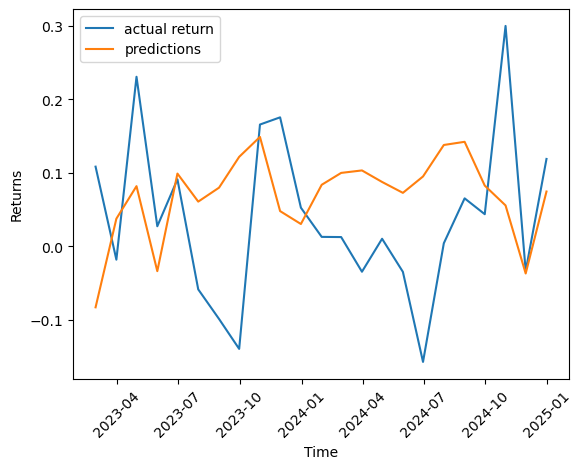

JPM
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0064 - val_loss: 0.0042
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0042
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0044
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - val_loss: 0.0044
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0061 - val_loss: 0.0043
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - va

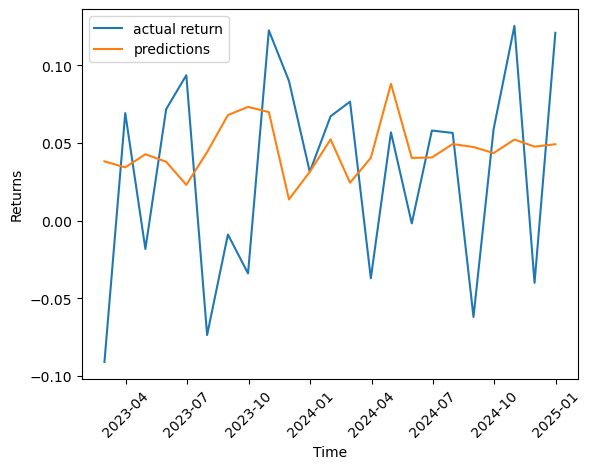

MSFT
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038 - v

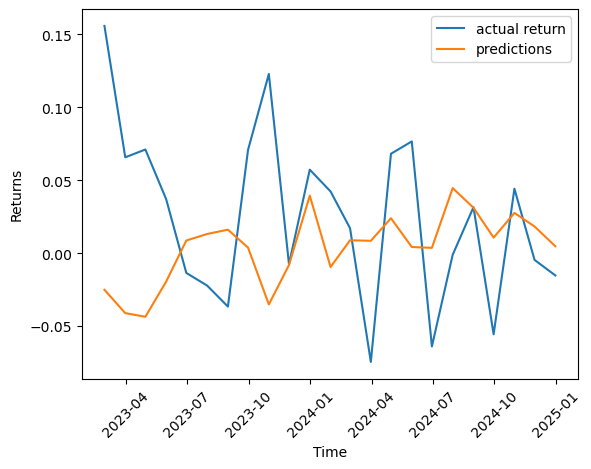

NOW
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0095 - val_loss: 0.0054
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - val_loss: 0.0054
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078 - val_loss: 0.0054
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0088 - val_loss: 0.0054
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0083 - val_loss: 0.0054
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 0.0053
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086 - val_loss: 0.0053
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - val_loss: 0.0055
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0081 - val_loss: 0.0057
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - va

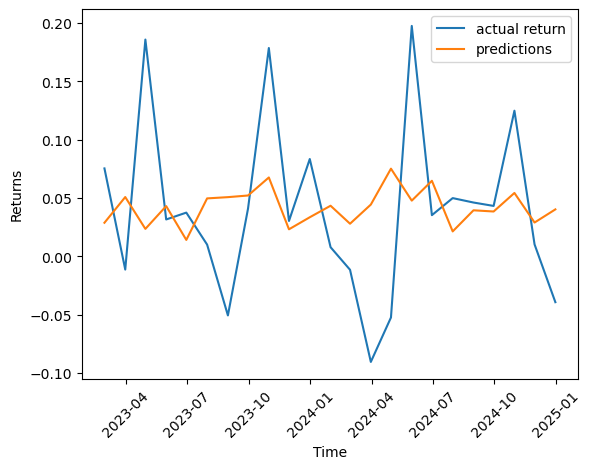

QCOM
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0162 - val_loss: 0.0078
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0143 - val_loss: 0.0078
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0119 - val_loss: 0.0078
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0127 - val_loss: 0.0078
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0147 - val_loss: 0.0078
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0111 - val_loss: 0.0078
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0119 - val_loss: 0.0078
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0121 - val_loss: 0.0079
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117 - val_loss: 0.0078
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0127 - val_loss: 0.0078
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0119 - val_loss: 0.0078
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0138 - v

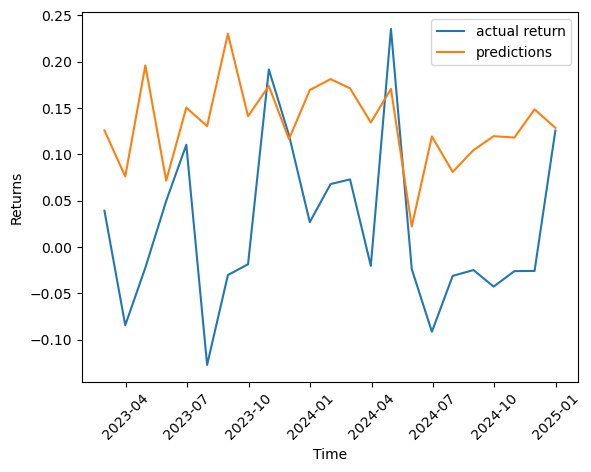

TSM
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0098 - val_loss: 0.0053
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 0.0064
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0064
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - val_loss: 0.0052
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0077 - val_loss: 0.0053
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - val_loss: 0.0057
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - val_loss: 0.0059
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0082 - val_loss: 0.0055
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086 - va

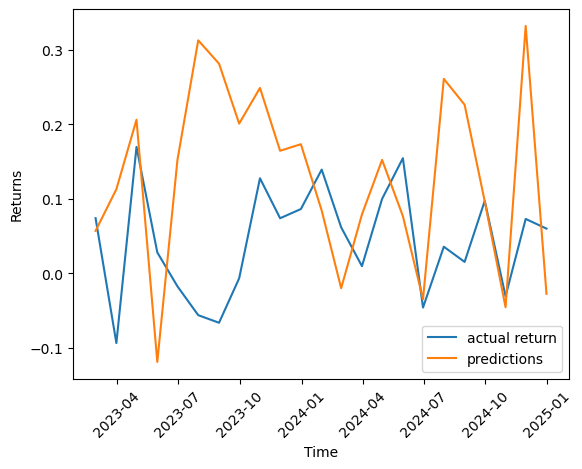

In [60]:
preds = {}

for stock in stock_list: 
    print(stock)
    df, X_train, X_test, y_train, y_test = test_train_split(stock)
    next_month_pred = lstm(X_train, X_test, y_train, y_test)

    preds[stock] = next_month_pred


In [61]:
result

,AAPL_RETURN,AVGO_RETURN,AXP_RETURN,BAC_RETURN,C_RETURN,CRM_RETURN,CSCO_RETURN,GDDY_RETURN,GS_RETURN,HUBS_RETURN,...,CSCO_ROLL_AVG,GDDY_ROLL_AVG,GS_ROLL_AVG,HUBS_ROLL_AVG,JPM_ROLL_AVG,MSFT_ROLL_AVG,NOW_ROLL_AVG,QCOM_ROLL_AVG,TSM_ROLL_AVG,SP500_ROLL_AVG
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,-0.037228,-0.099712,-0.021440,0.034609,0.021450,-0.042887,-0.063118,0.046788,0.012610,-0.024016,...,-0.002643,0.002632,0.000818,0.000327,0.000710,-0.002530,-0.001143,-0.003612,-0.001283,-0.001029
2015-07-31,-0.032927,-0.058602,-0.021358,0.050529,0.059190,0.052707,0.042936,0.008868,-0.017817,0.088140,...,-0.000614,-0.003025,-0.001459,0.001961,0.000154,0.000054,-0.000007,-0.001411,-0.001235,-0.000246
2015-08-31,-0.066196,0.006632,0.008677,-0.086130,-0.085186,-0.053752,-0.089374,-0.118143,-0.077144,-0.123448,...,-0.002499,-0.001538,-0.003710,-0.002020,-0.002426,-0.002064,-0.003251,-0.003536,-0.004540,-0.002434
2015-09-30,-0.021816,-0.004509,-0.033759,-0.043441,-0.072364,0.001009,0.014296,0.005183,-0.078685,-0.019454,...,-0.002252,-0.002204,-0.004542,-0.000041,-0.003494,-0.001926,-0.002675,-0.003941,0.001342,-0.002779
2015-10-31,0.083409,-0.015039,-0.007996,0.077021,0.072739,0.119257,0.107912,0.090044,0.079075,0.118827,...,0.004423,0.003552,0.001307,0.000278,0.002093,0.006596,0.003392,0.003004,0.002235,0.002051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,0.055155,0.434237,-0.025896,-0.069786,-0.006773,0.014308,-0.000169,-0.001012,-0.054412,-0.033673,...,0.001027,0.002651,-0.000947,0.001171,-0.000710,0.000651,0.001746,-0.001103,0.002336,0.000093
2025-01-31,-0.057583,-0.045592,0.072126,0.053470,0.156841,0.022044,0.030624,0.077418,0.118368,0.118777,...,0.001564,0.000690,0.003103,0.001602,0.003894,-0.002634,-0.003080,0.003160,0.001798,-0.000135
2025-02-28,0.025872,-0.098703,-0.051945,-0.004320,-0.011376,-0.128329,0.057921,-0.155890,-0.023461,-0.071248,...,0.002307,-0.002983,0.001162,0.000956,0.001674,-0.002157,-0.003824,-0.001320,-0.003892,0.000057


In [62]:
# pd.DataFrame(preds)
df = pd.DataFrame(preds.items(), columns=["Ticker", "Prediction"])
df.set_index('Ticker', inplace=True)
df



,Prediction
Ticker,
AAPL,0.033496
AVGO,-0.221811
AXP,0.075280
BAC,0.050093
C,0.112162
CRM,0.052690
CSCO,0.014964
GDDY,-0.013646
GS,0.029597


In [68]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 5, 31)

returns = yf.download(stock_list, start-pd.offsets.BDay(1), end+pd.offsets.BDay(1), auto_adjust=False)['Adj Close'].pct_change().dropna()
check_returns_mon = returns.resample(rule = 'ME').apply(lambda x: x.add(1).prod().sub(1))

check_returns_mon

[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AVGO,AXP,BAC,C,CRM,CSCO,GDDY,GS,HUBS,JPM,MSFT,NOW,QCOM,TSM
Date,,,,,,,,,,,,,,,
2015-04-30,0.005786,-0.079540,-0.008577,0.035087,0.034938,0.089957,0.047221,0.253500,0.044954,-0.029825,0.051180,0.196262,-0.049759,-0.019325,0.040886
2015-05-31,0.045340,0.266855,0.029309,0.035782,0.015215,-0.000961,0.016649,0.074192,0.053014,0.312322,0.039835,-0.030335,0.023377,0.024706,-0.006546
2015-06-30,-0.037228,-0.099713,-0.021440,0.034609,0.021450,-0.042887,-0.063118,0.046788,0.012610,-0.024016,0.030100,-0.057831,-0.030022,-0.094942,-0.034930
2015-07-31,-0.032927,-0.058602,-0.021359,0.050529,0.059190,0.052707,0.042935,0.008868,-0.017817,0.088140,0.017974,0.057758,0.083300,0.028102,-0.026420
2015-08-31,-0.066196,0.006633,0.008677,-0.086130,-0.085186,-0.053752,-0.089373,-0.118143,-0.077144,-0.123448,-0.064643,-0.061949,-0.118509,-0.113889,-0.100859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,0.055155,0.434237,-0.025896,-0.069786,-0.006773,0.014308,-0.000169,-0.001012,-0.054412,-0.033673,-0.040085,-0.004629,0.010177,-0.025903,0.072875
2025-01-31,-0.057583,-0.045592,0.072126,0.053470,0.156841,0.022044,0.030624,0.077418,0.118368,0.118777,0.120856,-0.015279,-0.039373,0.125700,0.059902
2025-02-28,0.025872,-0.098703,-0.051945,-0.004320,-0.011376,-0.128329,0.057921,-0.155890,-0.023461,-0.071248,-0.009914,-0.041618,-0.087021,-0.091135,-0.137541


In [ ]:
# real_ret = pd.DataFrame(check_returns_mon.iloc[-2])
# real_ret.columns = ["Actual"]

# check = pd.concat((real_ret, df), axis=1)
# check['Residual']  = check['Actual'] - check['Prediction']
# check['Residual'].values

# mse = np.sum((check['Residual'].values)**2)/len(check)

# mse
